Data retrieval successful. Status code: 200
No missing data found.


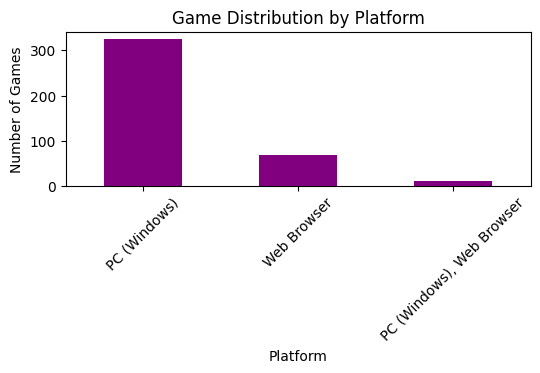

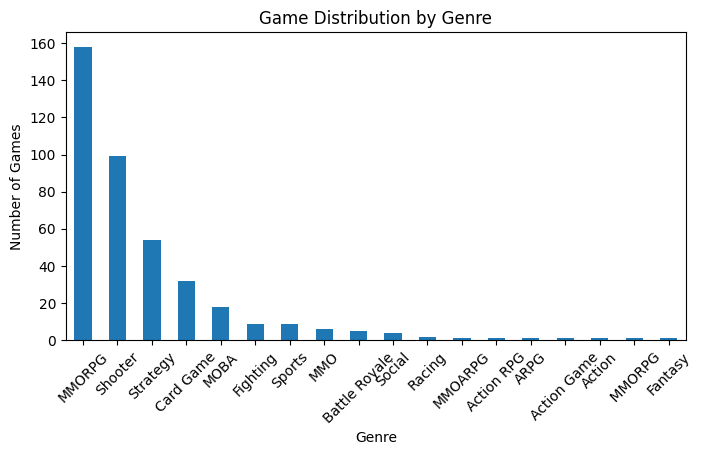

<Figure size 1000x600 with 0 Axes>

) missing from font(s) DejaVu Sans.kages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\pc\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\pc\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65286 (\N{FULLWIDTH AMPERSAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


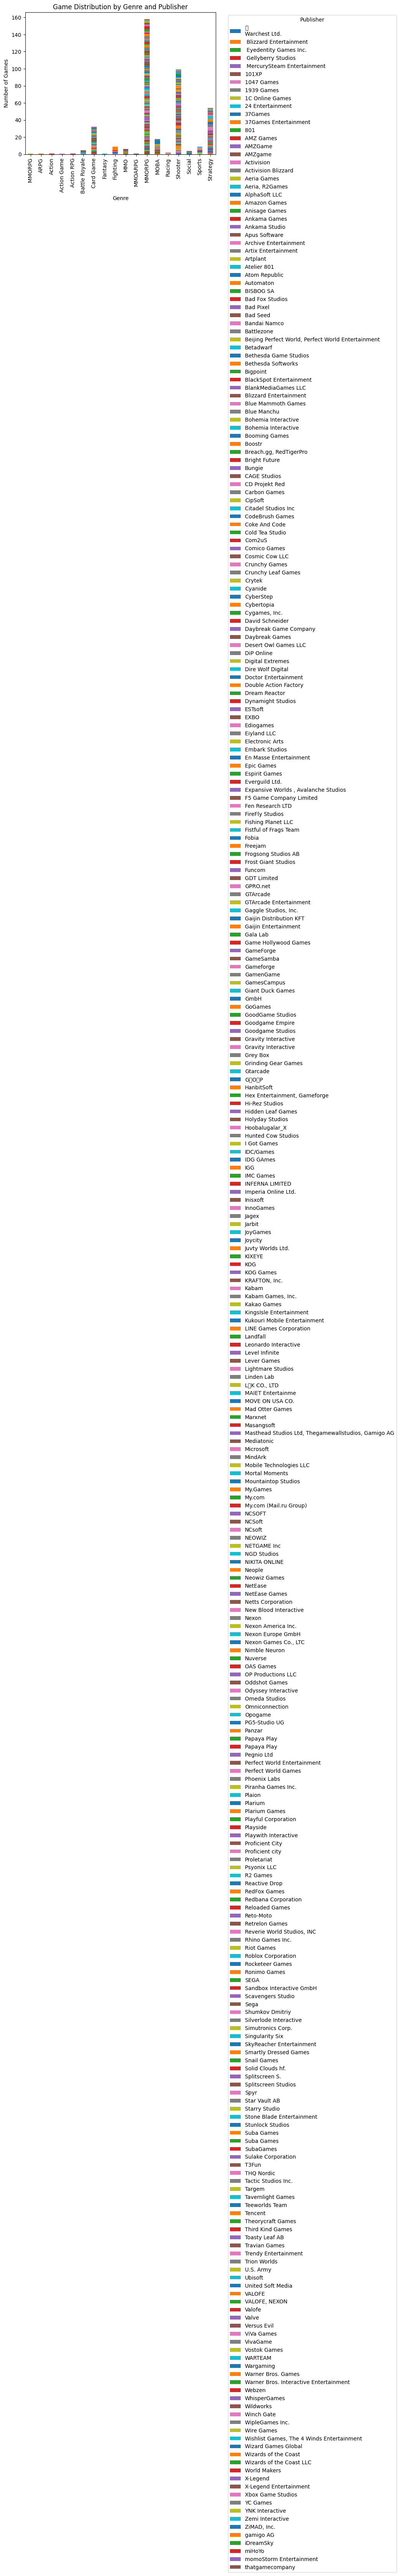

<Figure size 1000x600 with 0 Axes>

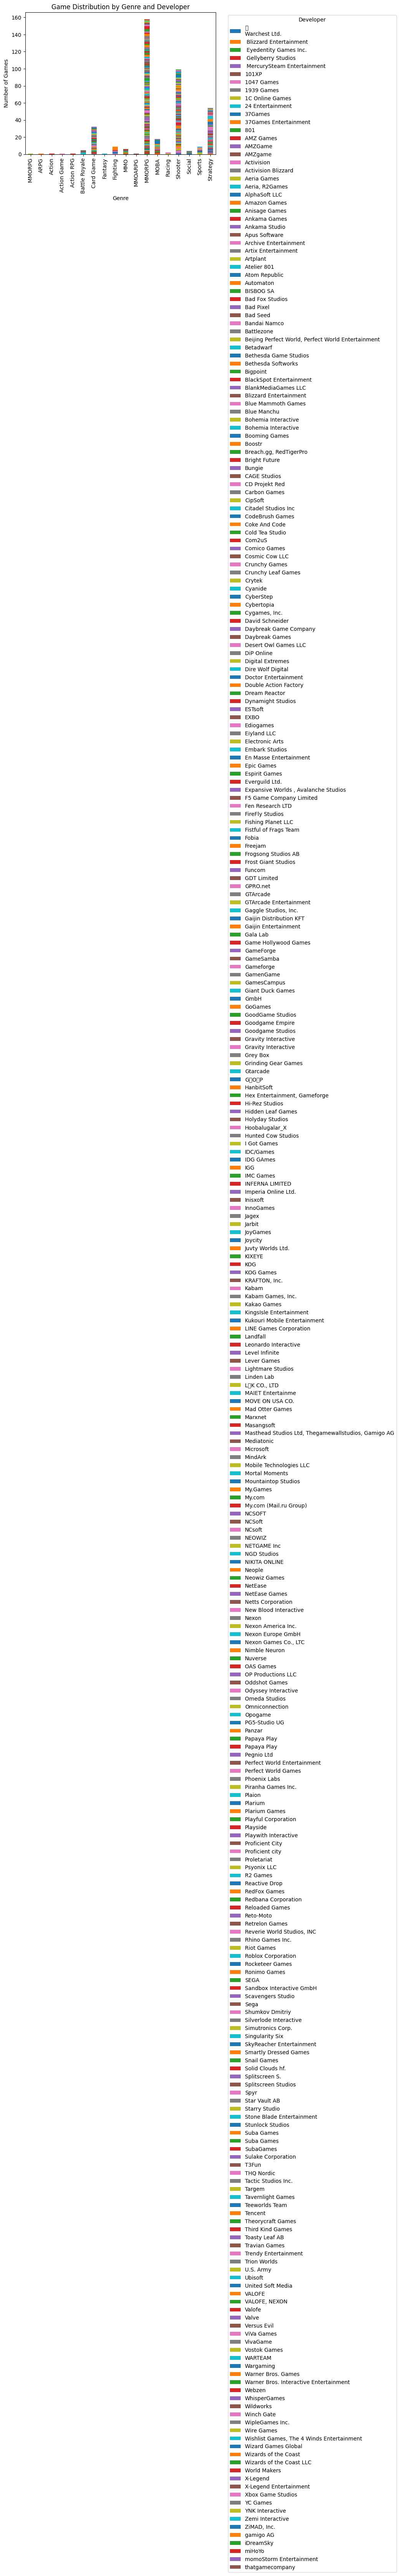


 Solution to count the most repeated words in the short description column is as follow:

                 Word  Count
0                   A    328
1                 and    163
2        free-to-play    147
3                  to    142
4                 the    140
5                  of    115
6                game    105
7                   a    101
8                with    100
9              MMORPG     94
10               free     92
11               play     90
12                 in     74
13                 by     73
14                MMO     58
15                 on     51
16               from     46
17            fantasy     46
18          developed     43
19            shooter     43
20        multiplayer     41
21                 3D     40
22              based     39
23               that     37
24                 2D     36
25           strategy     33
26             online     32
27          published     32
28      browser-based     31
29            popular     29
30        

In [1]:
#This part imports necessary libraries for the project
import pandas as pd
import requests
import matplotlib.pyplot as plt
from collections import Counter


# Part(A):
#The code below reads data of the games directly from freetogame website with the use of web scrapping methods.
url = "https://www.freetogame.com/api/games"
response = requests.get(url)
if response.status_code == 200: # 200 is the HTTP response status code for successful.
    games_data = response.json() # we read data in json format.
    df = pd.DataFrame(games_data) # we convert data to dataframe format.
    
    # Displaying the status of data retrieval
    print("Data retrieval successful. Status code:", response.status_code)
    
#Part(B):
    #Checking for missing data
    if df.isnull().values.any():
        print("Warning: Missing data detected.")
    else:
        print("No missing data found.")
    
    #print(df) #Uncomment tis line to see the data

    
#Part(D):
    # Analyzing game trends for different platforms
    platform_counts = df['platform'].value_counts()
    
    # Plotting the distribution of games across platforms
    plt.figure(figsize=(6, 2))
    platform_counts.plot(kind='bar', xlabel='Platform', ylabel='Number of Games', title='Game Distribution by Platform',color='purple')
    plt.xticks(rotation=45)


#Part(E):
    # Analyzing game trends for different genres
    genre_counts = df['genre'].value_counts()
    
    # Plotting the distribution of games across genres
    plt.figure(figsize=(8, 4))
    genre_counts.plot(kind='bar', xlabel='Genre', ylabel='Number of Games', title='Game Distribution by Genre')
    plt.xticks(rotation=45)

    
# Analyzing game trends for genres based on publisher
    genre_publisher_counts = df.groupby(['genre', 'publisher']).size().unstack(fill_value=0)
     # Plotting the distribution of games across genres by publisher
    plt.figure(figsize=(10, 6))
    genre_publisher_counts.plot(kind='bar', stacked=True)
    plt.xlabel('Genre')
    plt.ylabel('Number of Games')
    plt.title('Game Distribution by Genre and Publisher')
    plt.legend(title='Publisher', bbox_to_anchor=(1.05, 1), loc='upper left')

    
# Analyzing game trends for genres based on developer
    genre_developer_counts = df.groupby(['genre', 'developer']).size().unstack(fill_value=0)
     # Plotting the distribution of games across genres by publisher
    plt.figure(figsize=(10, 6))
    genre_publisher_counts.plot(kind='bar', stacked=True)
    plt.xlabel('Genre')
    plt.ylabel('Number of Games')
    plt.title('Game Distribution by Genre and Developer')
    plt.legend(title='Developer', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()
#else:
    #print("Failed to retrieve data. Status code:", response.status_code)

#Part(F)
    print('\n Solution to count the most repeated words in the short description column is as follow:\n')
    if 'short_description' in df.columns:
        # Extracting the short_description column
        short_descriptions = df['short_description'].str.split().sum()
        # Counting the occurrences of each word
        word_counts = Counter(short_descriptions)
        # Sorting the words by frequency in descending order
        sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    data = {'Word': [word for word, _ in sorted_words if _ > 1],
        'Count': [count for _, count in sorted_words if count > 1]}
    # Creating a DataFrame from the data
    result_df = pd.DataFrame(data)
     # Displaying the whole table
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    print(result_df)
    print("\n Solution of the most repeated words based on genre of the games is as follows:\n")

     # Finding most repeated words by genre
    for genre in df['genre'].unique():
            genre_descriptions = df[df['genre'] == genre]['short_description'].str.split().sum()
            genre_word_counts = Counter(genre_descriptions)
            genre_sorted_words = sorted(genre_word_counts.items(), key=lambda x: x[1], reverse=True)
            print(f"\nGenre: {genre}")
            for word, count in genre_sorted_words:
                if count > 0: # the value zero can be one, then the output does not display the words that have occurrences 1. 
                    print(f"Word: {word}, Count: {count}")
else:
    print("Failed to retrieve data. Status code:", response.status_code)